In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [29]:
df = pd.read_json('/Users/butler/Documents/hp/ultimate_challenge/logins.json')

In [30]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [32]:
df['instances'] = 1

In [33]:
df.head()

,login_time,instances
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [34]:
df.set_index('login_time', inplace=True)

In [35]:
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [36]:
df.head()

,instances
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   instances  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [38]:
df15 = df.resample('15min').sum()

In [39]:
df15

,instances
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [40]:
df15.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

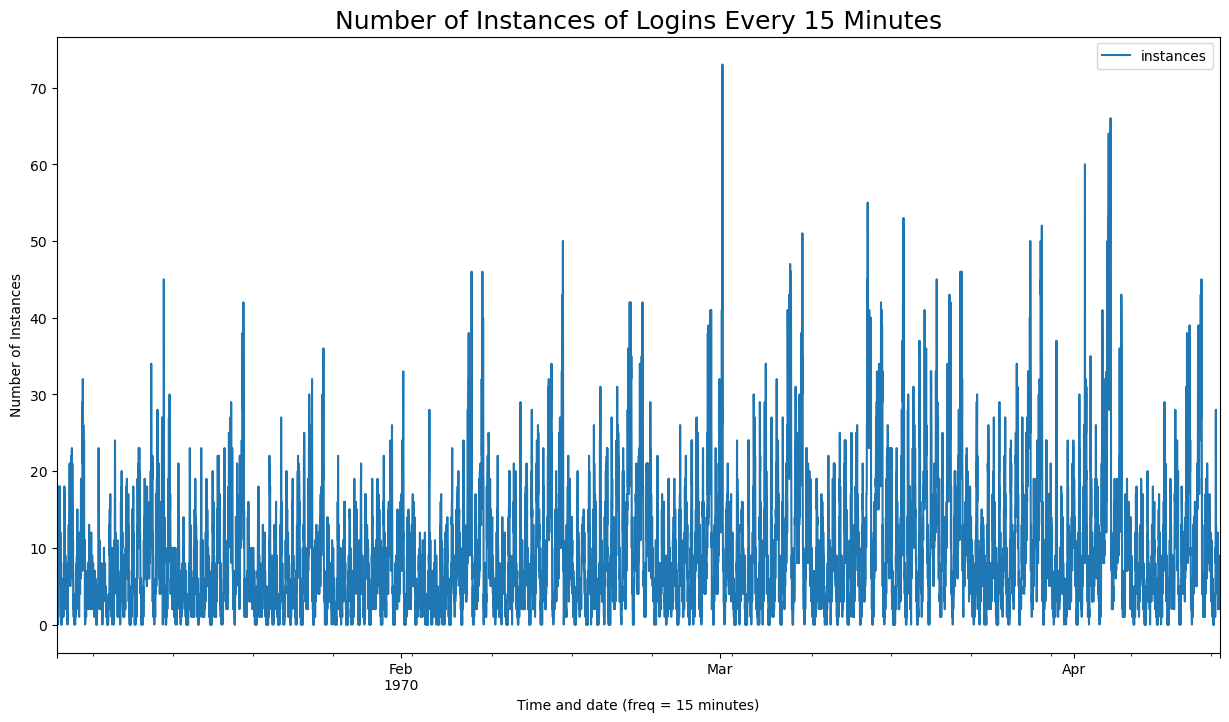

In [41]:
df15.plot(figsize=(15,8))
_ = plt.title('Number of Instances of Logins Every 15 Minutes', fontsize=18)
_ = plt.xlabel('Time and date (freq = 15 minutes)')
_ = plt.ylabel('Number of Instances')

In [42]:
df15j = df15.loc['1970-1-2':'1970-1-12']

In [43]:
df15j.head()

,instances
login_time,
1970-01-02 00:00:00,10
1970-01-02 00:15:00,18
1970-01-02 00:30:00,12
1970-01-02 00:45:00,13
1970-01-02 01:00:00,9


Text(0, 0.5, 'Number of Instances')

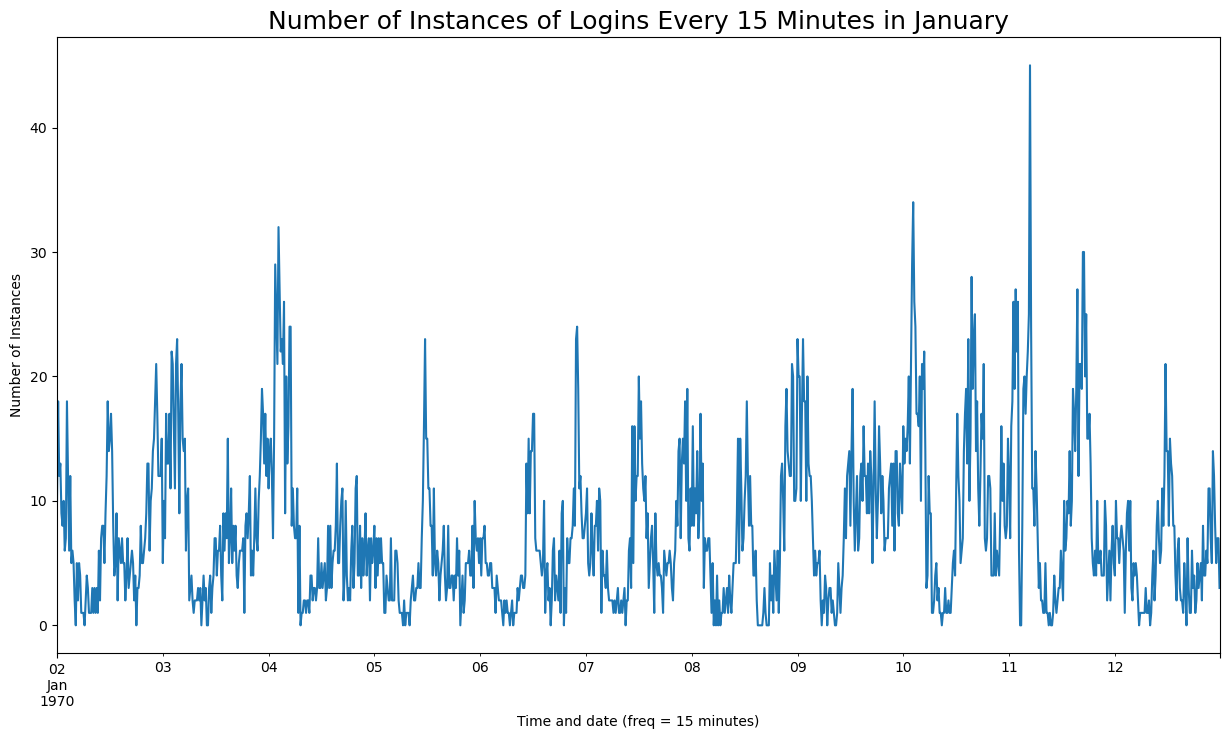

In [44]:
_ = df15j.instances.plot(figsize=(15,8))
plt.title('Number of Instances of Logins Every 15 Minutes in January', fontsize=18)
plt.xlabel('Time and date (freq = 15 minutes)')
plt.ylabel('Number of Instances')

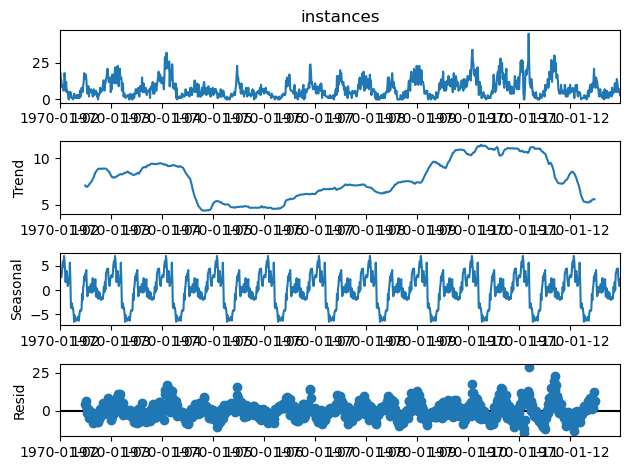

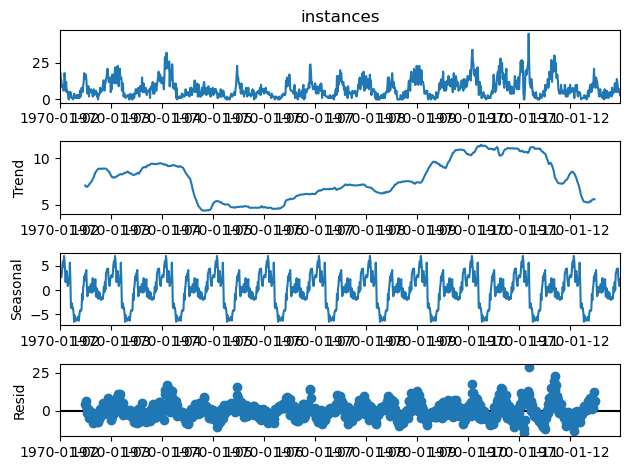

In [45]:


y = df15j.instances
period = 4 * 24
decompositionm = sm.tsa.seasonal_decompose(y, period=period)
decompositionm.plot()


In [46]:
df15f = df15.loc['1970-2-1':'1970-2-28']

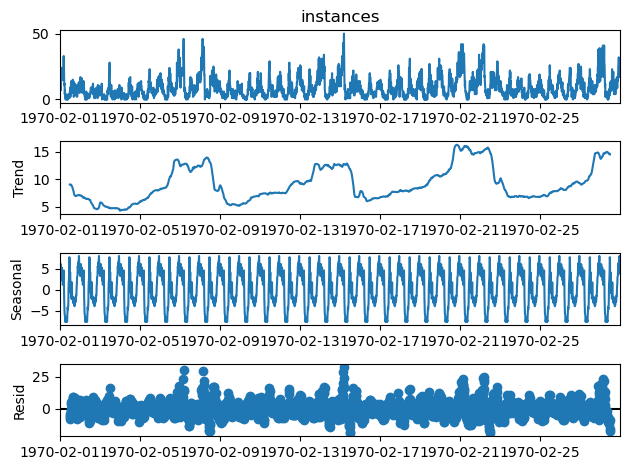

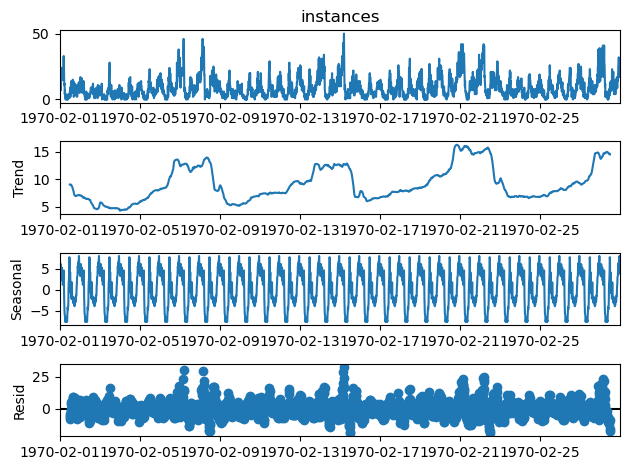

In [47]:
y = df15f.instances
period = 4 * 24
decompositionf1 = sm.tsa.seasonal_decompose(y, period=period)
decompositionf1.plot()

In [48]:
df15m = df15.loc['1970-3-1':'1970-3-12']

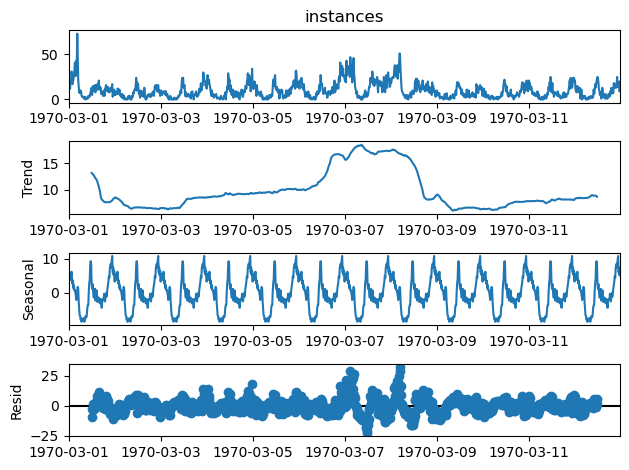

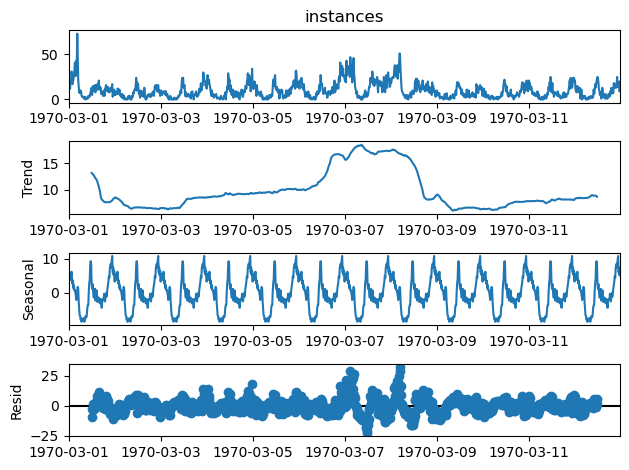

In [49]:
y = df15m.instances
period = 4 * 24
decompositionm1 = sm.tsa.seasonal_decompose(y, period=period)
decompositionm1.plot()

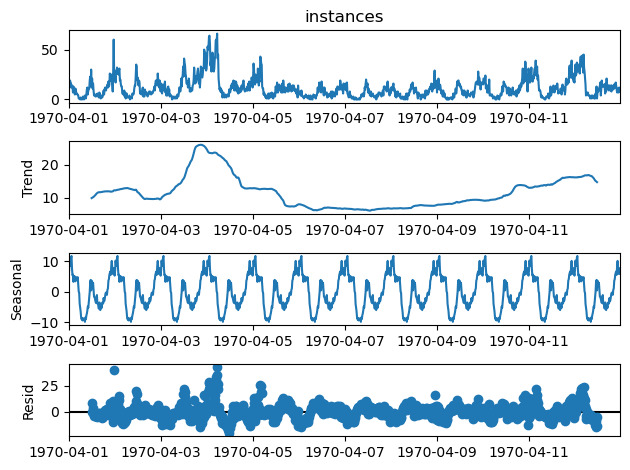

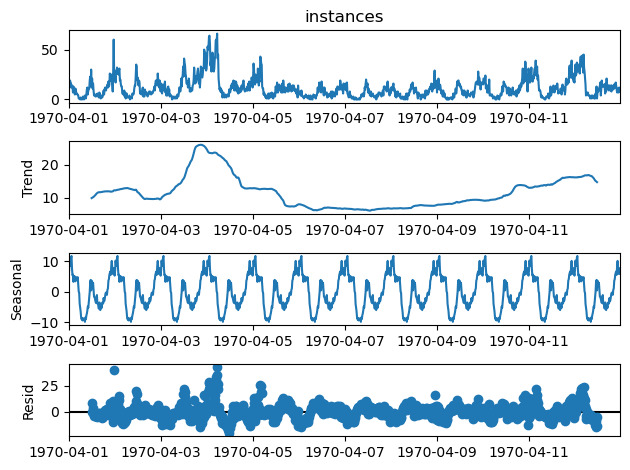

In [50]:
df15a = df15.loc['1970-4-1':'1970-4-12']

y = df15a.instances
period = 4 * 24
decompositiona = sm.tsa.seasonal_decompose(y, period=period)
decompositiona.plot()

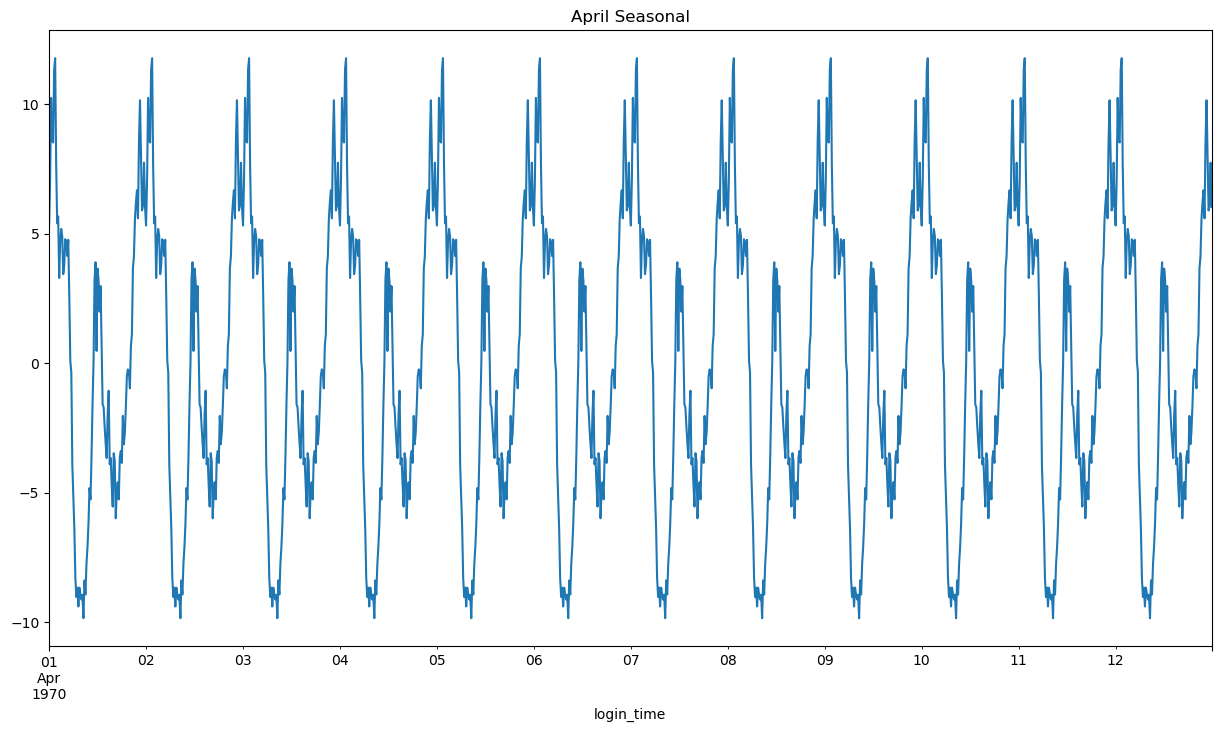

In [51]:
_ = decompositiona.seasonal.plot(figsize=(15,8))
_ = plt.title('April Seasonal')

## When comparing the first 13 days of each month, the daily changes are similar but not identical.

In [52]:
df15ja = df15.loc['1970-1-2':'1970-1-28']
df15fa = df15.loc['1970-2-2':'1970-2-28']
df15ma = df15.loc['1970-3-2':'1970-3-28']
df15aa = df15.loc['1970-4-2':'1970-4-13']

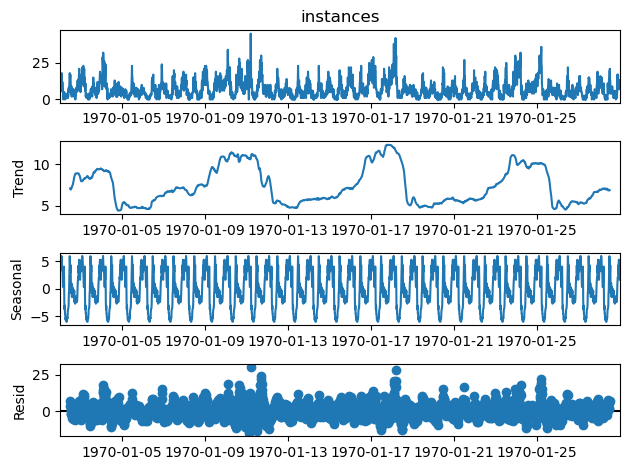

In [53]:
y = df15ja.instances
decompositionja = sm.tsa.seasonal_decompose(y, period=period)
_ = decompositionja.plot()

In [54]:
y = df15fa.instances
decompositionfa = sm.tsa.seasonal_decompose(y, period=period)

In [55]:
y = df15ma.instances
decompositionma = sm.tsa.seasonal_decompose(y, period=period)

In [56]:
y = df15aa.instances
decompositionaa = sm.tsa.seasonal_decompose(y, period=period)

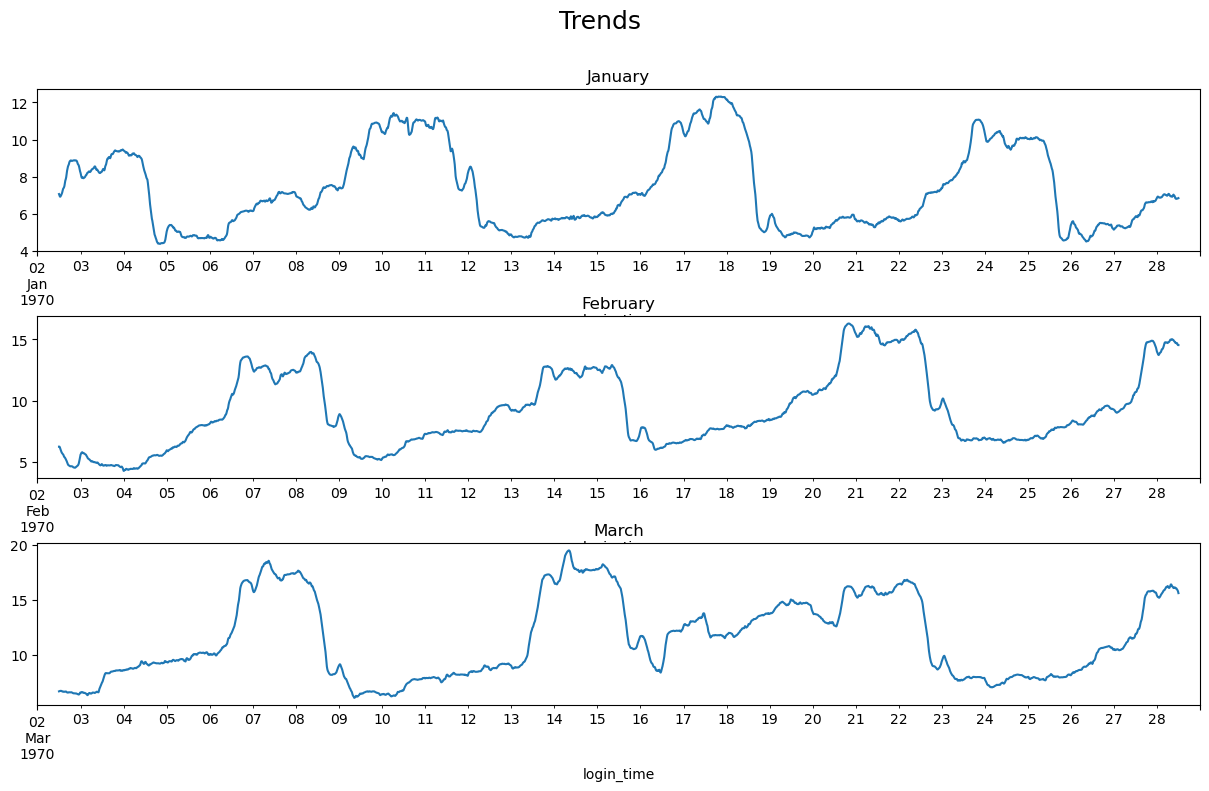

In [81]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8), sharex='row')
fig.subplots_adjust(hspace=.4)
_ = decompositionja.trend.plot(ax=ax1)
_ = decompositionfa.trend.plot(ax=ax2)
_ = decompositionma.trend.plot(ax=ax3)

ax1.title.set_text('January')
ax2.title.set_text('February')
ax3.title.set_text('March')

_ = fig.suptitle('Trends', fontsize=18)

## For February and March, the trends are very similar while the low points in February and March are the high points in January. April was not plotted because it only has 13 days of data.

In [58]:
y = df15.instances
decomposition = sm.tsa.seasonal_decompose(y, period=period)

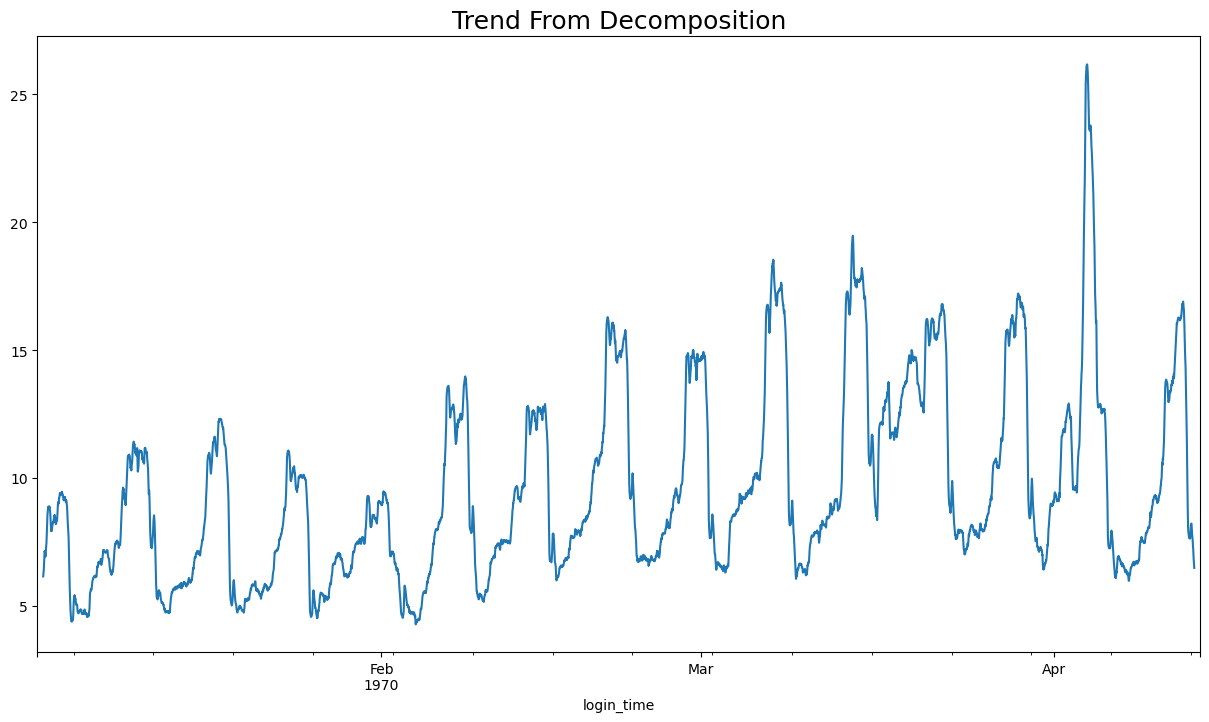

In [59]:
figsize=(15,8)
decomposition.trend.plot(figsize=(15,8))
_ = plt.title('Trend From Decomposition', fontsize=18)

## The decomposition trend shows that usage is largest in March with the beginning of April being close to the end of February. January has the lowest usage. In the first week of April, there is a surge in usage. I do not know whether this is an error in the data or whether an event occurred for which more transportation was needed.

In [73]:
df15j1 = df15.loc['1970-1-6':'1970-1-7']
y = df15j1.instances
period = 4 * 24
decompositionj1 = sm.tsa.seasonal_decompose(y, period=period)

In [74]:
df15f1 = df15.loc['1970-2-6':'1970-2-7']

y = df15f1.instances
period = 4 * 24
decompositionf1 = sm.tsa.seasonal_decompose(y, period=period)

In [75]:
df15m1 = df15.loc['1970-3-6':'1970-3-7']

y = df15m1.instances
period = 4 * 24
decompositionm1 = sm.tsa.seasonal_decompose(y, period=period)

In [76]:
df15a1 = df15.loc['1970-4-6':'1970-4-7']

y = df15a1.instances
period = 4 * 24
decompositiona1 = sm.tsa.seasonal_decompose(y, period=period)


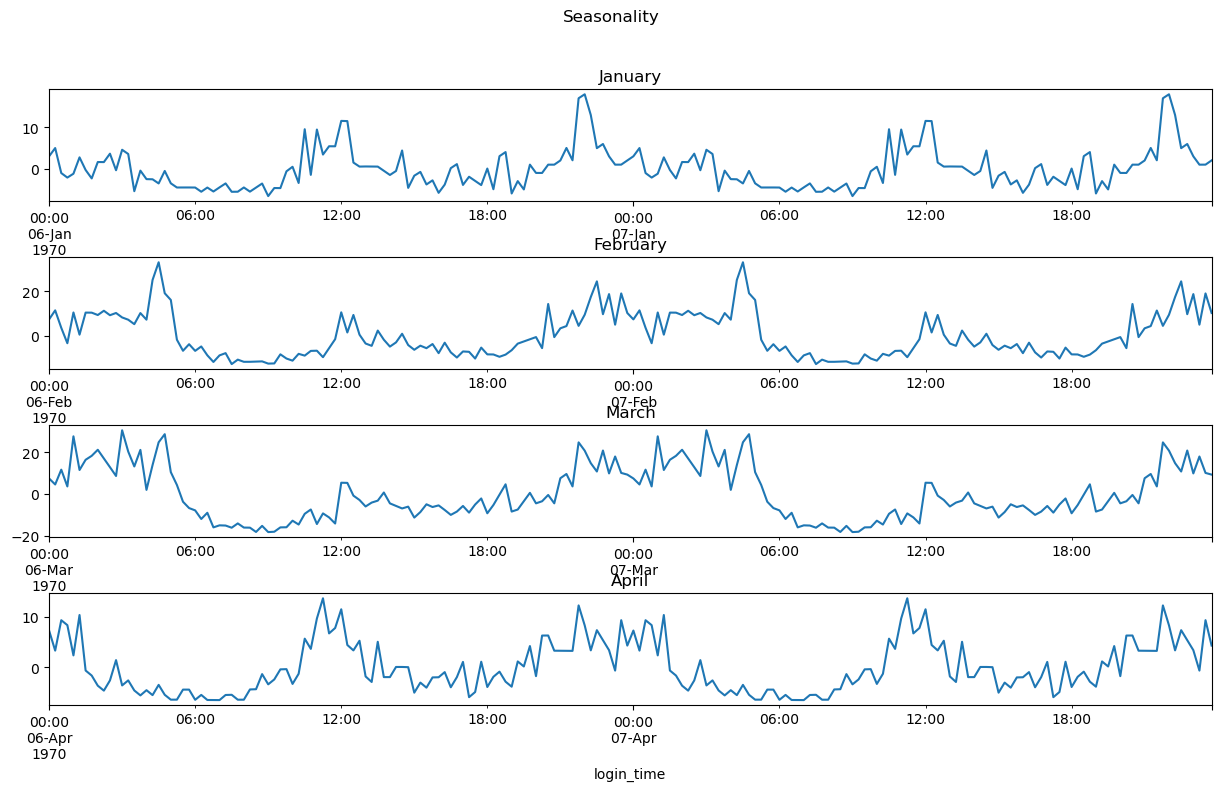

In [79]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
fig.subplots_adjust(hspace=.5)
_ = decompositionj1.seasonal.plot(ax=ax1)
_ = decompositionf1.seasonal.plot(ax=ax2)
_ = decompositionm1.seasonal.plot(ax=ax3)
_ = decompositiona1.seasonal.plot(ax=ax4)
ax1.title.set_text('January')
ax2.title.set_text('February')
ax3.title.set_text('March')
ax4.title.set_text('April')
_ = fig.suptitle('Seasonality')
